# Stroke Prediction Using Machine Learning on a Clinical Dataset
## Step-by-Step Explanation Notebook
---
### Overview
#### Project summary and notebook goal
From a given dataset, the goal of this project is to train a model that predicts whether a patient has a stroke or not. In order to show all the steps to build this machine learning model this notebook will be organized following this schema - CRISP-DM workflow:
- **Data Processing & Analytics**
    - Data analysis: data processing, data cleaning, exploratory analysis, plotting, etc.
    - Feature Engineering & Selection: feature pruning, choice justification, feature engineering.
- **Model Development**
    - Models selection & training: motivation for selected model and training.
    - Models evaluation: comparison, evaluation metric and results interpretation.
- **Performance Optimisation**
    - Results conclusion: analysis of the different results and thoughts on improvement.
    - Optimisation solutions:
        - Synthetic Minority Over-Sampling Technique (SMOTE).
        - Hard-code thresholding layer.
- **Final Model & Perspectives for Future Work**
#### Dataset description
The given dataset has the following features: 
1) **id**: unique patient identifier
2) **gender**: "Male", "Female", "Other"
3) **age**: age of the patient
4) **hypertension**: 0 (if the patient doesn’t have hypertension) or 1 (if the patient has
hypertension)
5) **heart_disease**: 0 (if the patient doesn’t have a heart disease) or 1 (if the patient has
a heart disease)
6) **ever_married**: "No" or "Yes"
7) **work_type**: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8) **Residence_type**: "Rural" or "Urban"
9) **avg_glucose_level**: average glucose level in the blood
10) **bmi**: body mass index
11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown" (in
this case the information for the patient is not available)
12) **stroke**: 1 (if the patient had a stroke) or 0 (if the patient didn’t have a stroke)
---
### Data processing & Analytics
#### Data analysis
In this section, the goal is to perfom the Exploratory Data Analysis (EDA):
- Assess data quality and explore the raw data to understand its structure.
- Discover relationships different features such as correlations and statistical links.
This foundational step provides the necessary insights to make informed decisions during the Feature Engineering phase.
##### 1) Assessment of data structure and quality

In [3]:
'''
Import the library needed to proceed with the data exploration and analysis
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
In order to ensure a better plot display throughout the notebook
'''
%matplotlib inline

'''
Extract the data from the csv file
'''
raw_data = pd.read_csv('stroke_data.csv', index_col=0)

In [4]:
'''
Searching for unconsistancy in the raw data: such as missing values
'''
print(raw_data.isna().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [5]:
'''
Classical statistical check
'''
print(raw_data.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  


In [6]:
'''
Quick search for strong correlation between the features and the stroke prevalence
'''
raw_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']].corrwith(raw_data['stroke'])

age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.042374
dtype: float64

**Observations**</br>
The interesting facts that we can observe so far are:
- only the BMI columns has a large number of missing values
- the percentage of strokes in the data is only 4.8%.
##### 2) Features analysis

**2.1) Gender**

In [7]:
percentage_female_stroke = raw_data[(raw_data.stroke == 1) & (raw_data.gender == 'Female')]['stroke'].mean()
percentage_male_stroke = raw_data[(raw_data.stroke == 1) & (raw_data.gender == 'Male')]['stroke'].mean()
nbr_other = (raw_data['gender'] == 'Other').sum()

print(f"The percentage of female having strokes is: {percentage_female_stroke} %.\n"
      f"The percentage of male having strokes is: {percentage_male_stroke} %.\n"
f"The number of people that replied 'Other' about their gender is: {nbr_other}.") 

The percentage of female having strokes is: 1.0 %.
The percentage of male having strokes is: 1.0 %.
The number of people that replied 'Other' about their gender is: 1.


**Observations**</br>
The proportion of stroke cases is identical for males and females.</br>
Selecting “Other” for gender is effectively equivalent to a missing value, as it does not contribute meaningful information. Fortunately, only one person in the dataset selected this option.

**2.2) age**

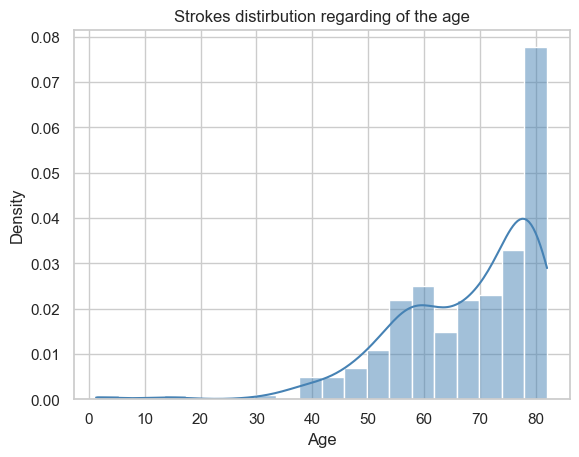

In [8]:
stroke_age = raw_data.loc[raw_data['stroke'] == 1, 'age']

sns.set_theme(style="whitegrid")
sns.histplot(stroke_age, kde=True, stat="density", bins=20, color="steelblue")
plt.title("Strokes distirbution regarding of the age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

**Observation**</br>
Stroke prevalence increases markedly with age.

**2.2) hypertension & heart_disease**

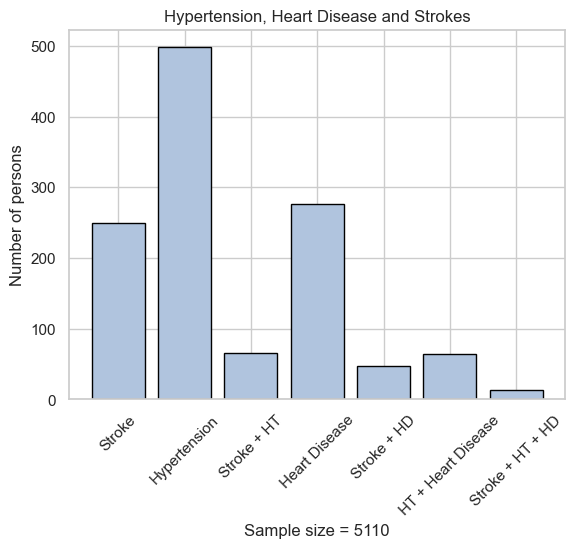

In [9]:
# Number of people aand number of strokes in the dataset
total_sample = raw_data.shape[0]
nb_stroke = (raw_data['stroke'] == 1).sum()

# hypertension -> stroke
nb_hypertension = (raw_data['hypertension'] == 1).sum()
nb_stroke_hypertension = ((raw_data['hypertension'] == 1) & (raw_data['stroke'] == 1)).sum()

# heart_disease -> stroke
nb_heart_disease = (raw_data['heart_disease'] == 1).sum()
nb_stroke_heart_disease = ((raw_data['heart_disease'] == 1) & (raw_data['stroke'] == 1)).sum()

# hypertension + heart_disease -> stroke
nb_hypertenstion_heart_disease = ((raw_data['hypertension'] == 1) & (raw_data['heart_disease'] == 1)).sum()
nb_stroke_hypertenstion_heart_disease = ((raw_data['hypertension'] == 1) & (raw_data['heart_disease'] == 1) & (raw_data['stroke'] == 1)).sum()

# Bar Chart Plotting to explore the data
%matplotlib inline 
categories = ['Stroke', 'Hypertension', 'Stroke + HT', 'Heart Disease', 'Stroke + HD', 'HT + Heart Disease', 'Stroke + HT + HD']
values = [nb_stroke, nb_hypertension, nb_stroke_hypertension, 
          nb_heart_disease, nb_stroke_heart_disease, nb_hypertenstion_heart_disease,
          nb_stroke_hypertenstion_heart_disease]
plt.bar(categories, values, color='lightsteelblue', edgecolor='black')
plt.xlabel(f"Sample size = {total_sample}")
plt.ylabel('Number of persons')
plt.title('Hypertension, Heart Disease and Strokes')
plt.xticks(rotation=45)
plt.show()

In [10]:
percentage_ht_stroke = (nb_stroke_hypertension / nb_hypertension) * 100
percentage_hd_stroke = (nb_stroke_heart_disease / nb_heart_disease) * 100
percentage_ht_hd_stroke = (nb_stroke_hypertenstion_heart_disease / nb_hypertenstion_heart_disease) * 100
percentage_ht_hd_stroke_in_strokes = (nb_stroke_hypertenstion_heart_disease / nb_stroke) * 100

print(f"The percentage of people having strokes in the hypertension sample is: {percentage_ht_stroke:.1f} %.\n"
      f"The percentage of people having strokes in the heart disease sample is: {percentage_hd_stroke:.1f} %.\n"
f"The percentage of people having strokes in the hypertension and heart disease sample is: {percentage_ht_hd_stroke:.1f} %.\n"
f"The percentage of people having hypertension and heart disease in the strokes sample is: {percentage_ht_hd_stroke_in_strokes:.1f} %.")

The percentage of people having strokes in the hypertension sample is: 13.3 %.
The percentage of people having strokes in the heart disease sample is: 17.0 %.
The percentage of people having strokes in the hypertension and heart disease sample is: 20.3 %.
The percentage of people having hypertension and heart disease in the strokes sample is: 5.2 %.


**Observations**</br>
Stroke prevalence rises in individuals with hypertension *and/or* heart disease. However, as exemple,even though the group with both hypertension and heart disease appears to be at the highest risk—with 20.3% of them experiencing a stroke—they represent only 5.2% of the overall stroke population. Consequently, these features alone provide limited discriminatory power for predicting stroke occurrence.

**2.3) ever_married**

In [11]:
nb_married = (raw_data.ever_married == 'Yes').sum()
married_strokes = ((raw_data.ever_married == 'Yes') & (raw_data.stroke == 1)).sum()
percentage_married = (married_strokes / nb_married) * 100

nb_single = (raw_data.ever_married == 'No').sum()
single_strokes = ((raw_data.ever_married == 'No') & (raw_data.ever_married == 1)).sum()
percentage_single = (single_strokes / nb_single) * 100

print(f"Percentage of Strokes in at least once married population: {percentage_married}%")
print(f"Percentage of Strokes in never married population: {percentage_single}%")

age_married_mean = raw_data.groupby('ever_married')['age'].mean()

print(age_married_mean)

Percentage of Strokes in at least once married population: 6.56128839844915%
Percentage of Strokes in never married population: 0.0%
ever_married
No     22.014229
Yes    54.342082
Name: age, dtype: float64


**Observations**</br>
The notion of being married or not is not entirely clear. In fact, “not married” does not necessarily mean “single,” as it is a broad marital status category. Moreover, this variable is strongly confounded by age, since individuals are more likely to form relationships as they get older.

**2.4) work_type**

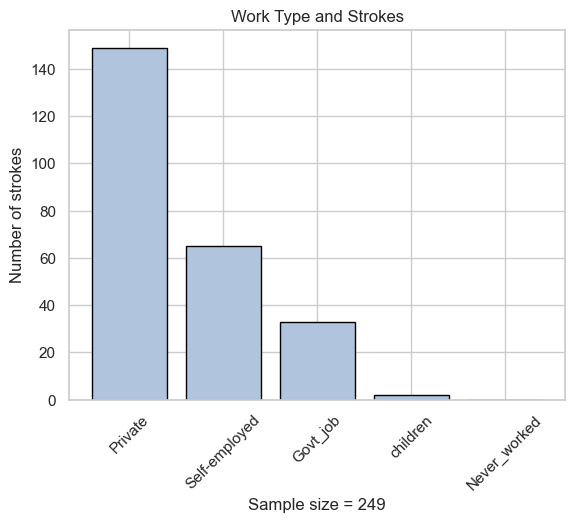

In [12]:
nb_private = ((raw_data['work_type'] == 'Private') & (raw_data['stroke'] == 1)).sum()
nb_self_employed = ((raw_data['work_type'] == 'Self-employed') & (raw_data['stroke'] == 1)).sum()
nb_govt_job = ((raw_data['work_type'] == 'Govt_job') & (raw_data['stroke'] == 1)).sum()
nb_children = ((raw_data['work_type'] == 'children') & (raw_data['stroke'] == 1)).sum()
nb_never_worked = ((raw_data['work_type'] == 'Never_worked') & (raw_data['stroke'] == 1)).sum()

%matplotlib inline 
categories = ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
values = [nb_private, nb_self_employed, nb_govt_job, 
          nb_children, nb_never_worked]
plt.bar(categories, values, color='lightsteelblue', edgecolor='black')
plt.xlabel(f"Sample size = {nb_stroke}")
plt.ylabel('Number of strokes')
plt.title('Work Type and Strokes')
plt.xticks(rotation=45)
plt.show()

In [13]:
percentage_private_stroke = (nb_private / (raw_data['work_type'] == 'Private').sum()) * 100
percentage_govt_stroke = (nb_govt_job / (raw_data['work_type'] == 'Govt_job').sum()) * 100
percentage_self_stroke = (nb_self_employed / (raw_data['work_type'] == 'Self-employed').sum()) * 100

print(f'Number of people working in private sector: {(raw_data['work_type'] == 'Private').sum()}')
print(f'Number of people working for the government: {(raw_data['work_type'] == 'Govt_job').sum()}')
print(f'Number of people being self_employed: {(raw_data['work_type'] == 'Self-employed').sum()}')
print(f'Number of children: {(raw_data['work_type'] == 'children').sum()}')
print(f'Number of people that never worked: {(raw_data['work_type'] == 'Never_worked').sum()}')

print(f'The percentage of Private employee having stroke is: {percentage_private_stroke:.1f} %.')
print(f'The percentage of Government employee having strokes is {percentage_govt_stroke:.1f} %.')
print(f'The percentage of self employee having strokes is {percentage_self_stroke:.1f} %.')

Number of people working in private sector: 2925
Number of people working for the government: 657
Number of people being self_employed: 819
Number of children: 687
Number of people that never worked: 22
The percentage of Private employee having stroke is: 5.1 %.
The percentage of Government employee having strokes is 5.0 %.
The percentage of self employee having strokes is 7.9 %.


**Observations**</br>
The sample is unbalanced, with private employees overrepresented relative to government employees, self‑employed individuals, and those who have never worked. In addition, the “children” category is entirely confounded by age. Despite this, the self‑employed group shows nearly a 3% higher stroke prevalence than government or private employees, indicating that this feature retains some discriminatory value.

**2.5) Residence_type**

In [14]:
nb_rural = (raw_data.Residence_type == 'Rural').sum()
rural_strokes = ((raw_data.Residence_type == 'Rural') & (raw_data.stroke == 1)).sum()
percentage_rural = (rural_strokes / nb_rural) * 100

nb_urban = (raw_data.Residence_type == 'Urban').sum()
urban_strokes = ((raw_data.Residence_type == 'Urban') & (raw_data.stroke == 1)).sum()
percentage_urban = (urban_strokes / nb_urban) * 100

print(f'Number of people in the rural group: {(raw_data['Residence_type'] == 'Rural').sum()}')
print(f'Number of people in the urban group: {(raw_data['Residence_type'] == 'Urban').sum()}')
print(f"Percentage of Strokes in Rural population: {percentage_rural:.1f}%")
print(f"Percentage of Strokes in Urban population: {percentage_urban:.1f}%")

Number of people in the rural group: 2514
Number of people in the urban group: 2596
Percentage of Strokes in Rural population: 4.5%
Percentage of Strokes in Urban population: 5.2%


**Observation**</br>
The sample is evenly distributed between rural and urban populations. Although the urban group exhibits a 0.7% higher stroke prevalence, this small difference calls into question whether the variable provides meaningful discriminatory power.

**2.6) avg_glucose_level**

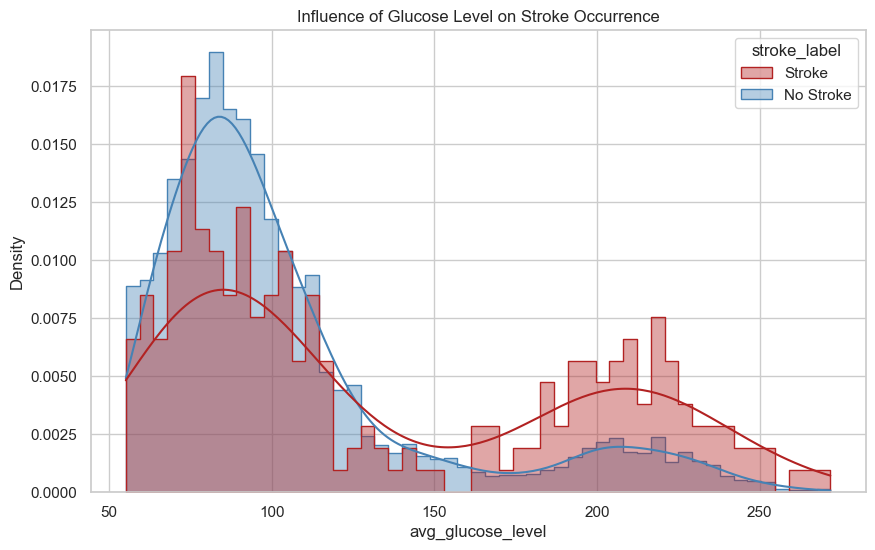

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(
    data=raw_data.assign(stroke_label=raw_data['stroke'].map({0: 'No Stroke', 1: 'Stroke'})), 
    x='avg_glucose_level', 
    hue='stroke_label',
    kde=True, 
    stat='density', 
    common_norm=False, 
    palette={'No Stroke': 'steelblue', 'Stroke': 'firebrick'},
    element='step', 
    alpha=0.4
)

plt.title('Influence of Glucose Level on Stroke Occurrence')
plt.show()

**Observation**</br>
Stroke prevalence rises sharply as average glucose levels increase. Above a certain threshold, stroke cases outnumber non‑stroke cases, indicating that this feature has substantial discriminatory value.

**2.7) bmi**

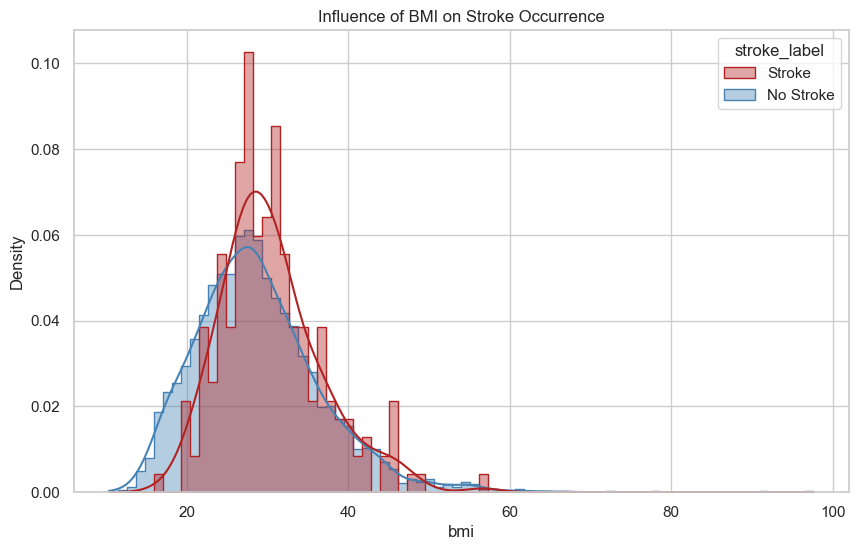

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(
    data=raw_data.assign(stroke_label=raw_data['stroke'].map({0: 'No Stroke', 1: 'Stroke'})),
    x='bmi',
    hue='stroke_label',
    kde=True,
    stat='density',
    common_norm=False,
    palette={'No Stroke': 'steelblue', 'Stroke': 'firebrick'},
    element='step', 
    alpha=0.4
)

plt.title('Influence of BMI on Stroke Occurrence')
plt.show()

In [17]:
'''
The World Health Organization has a classification for BMI and using it
should give a deeper understanding of the sttatistical link between BMI and stroke.
We will use this to encode a new column.
'''
normal_bmi = 24.9 # -> encode as 0
slightly_over_bmi = 29.9 # -> encode as 1
obesity_1 = 34.9 # -> encode as 2
obesity_2 = 39.9 # -> encode as 3
obesity_3 = 40 # -> encode as 4

bins = [0, normal_bmi, slightly_over_bmi, obesity_1, obesity_2, float('inf')]
labels = [0, 1, 2, 3, 4]

raw_data['bmi_classification'] = pd.cut(raw_data['bmi'], bins=bins, labels=labels, right=True) # New column encoding as defined earlier

'''
Computation of needed values to find deeper link
'''
nb_norm = (raw_data['bmi_classification'] == 0).sum()
nb_stroke_norm = ((raw_data['bmi_classification'] == 0) & (raw_data['stroke'] == 1)).sum()

nb_slightly_ov = (raw_data['bmi_classification'] == 1).sum()
nb_stroke_slightly_ov = ((raw_data['bmi_classification'] == 1) & (raw_data['stroke'] == 1)).sum()

nb_ob1 = (raw_data['bmi_classification'] == 2).sum()
nb_stroke_ob1 = ((raw_data['bmi_classification'] == 2) & (raw_data['stroke'] == 1)).sum()

nb_ob2 = (raw_data['bmi_classification'] == 3).sum()
nb_stroke_ob2 = ((raw_data['bmi_classification'] == 3) & (raw_data['stroke'] == 1)).sum()

nb_ob3 = (raw_data['bmi_classification'] == 4).sum()
nb_stroke_ob3 = ((raw_data['bmi_classification'] == 4) & (raw_data['stroke'] == 1)).sum()

percentage_stroke_class0 = (nb_stroke_norm / nb_norm) * 100
percentage_stroke_class1 = (nb_stroke_slightly_ov / nb_slightly_ov) * 100
percentage_stroke_class2 = (nb_stroke_ob1 / nb_ob1) * 100
percentage_stroke_class3 = (nb_stroke_ob2 / nb_ob2) * 100
percentage_stroke_class4 = (nb_stroke_ob3 / nb_ob3) * 100

print(f'The percentage of stroke in the Normal BMI group is {percentage_stroke_class0:.1f} %.\n'
      f'The percentage of stroke in the Slightly Over Normal BMI group is {percentage_stroke_class1:.1f} %.\n'
f'The percentage of stroke in the Obesity Class 1 group is {percentage_stroke_class2:.1f} %.\n'
f'The percentage of stroke in the Obesity Class 2 group is {percentage_stroke_class3:.1f} %.\n'
f'The percentage of stroke in the Obesity Class 3 group is {percentage_stroke_class4:.1f} %.\n')

The percentage of stroke in the Normal BMI group is 2.3 %.
The percentage of stroke in the Slightly Over Normal BMI group is 5.3 %.
The percentage of stroke in the Obesity Class 1 group is 5.6 %.
The percentage of stroke in the Obesity Class 2 group is 4.5 %.
The percentage of stroke in the Obesity Class 3 group is 4.6 %.



**Observations**</br>
The BMI distribution among stroke cases is slightly positively skewed and leptokurtic relative to the No‑Stroke group. Nevertheless, the percentages show that having a higher BMI does not necessarily mean that stroke occurrence increases proportionally. The shift occurs above a BMI of 24.9, marking the transition out of the Normal BMI range.

**2.7) smoking_status**

In [18]:
nb_unknown = (raw_data['smoking_status'] == 'Unknown').sum()
unknown_stroke = ((raw_data['smoking_status'] == 'Unknown') & (raw_data['stroke'] == 1)).sum()
unknown_percentage = (unknown_stroke / nb_unknown) * 100

nb_never = (raw_data['smoking_status'] == 'never smoked').sum()
never_stroke = ((raw_data['smoking_status'] == 'never smoked') & (raw_data['stroke'] == 1)).sum()
never_percentage = (never_stroke / nb_never) * 100

nb_formerly = (raw_data['smoking_status'] == 'formerly smoked').sum()
formely_stroke = ((raw_data['smoking_status'] == 'never smoked') & (raw_data['stroke'] == 1)).sum()
formely_percentage = (formely_stroke / nb_formerly) * 100

nb_smokes = (raw_data['smoking_status'] == 'smokes').sum()
smokes_stroke = ((raw_data['smoking_status'] == 'never smoked') & (raw_data['stroke'] == 1)).sum()
smokes_percentage= (smokes_stroke / nb_smokes) * 100

print(f'Unkown Smoking status stroke percentage is: {unknown_percentage:.1f} %.\n'
      f'Never Smoked Smoking status stroke percentage is: {never_percentage:.1f} %.\n'
f'Formely Smoked Smoking status stroke percentage is: {formely_percentage:.1f} %.\n'
f'Smokes Smoking status stroke percentage is: {smokes_percentage:.1f} %.')

Unkown Smoking status stroke percentage is: 3.0 %.
Never Smoked Smoking status stroke percentage is: 4.8 %.
Formely Smoked Smoking status stroke percentage is: 10.2 %.
Smokes Smoking status stroke percentage is: 11.4 %.


**Observation**</br>
Stroke prevalence increases markedly across smoking categories. Both former and current smokers exhibit more than double the stroke risk of individuals who have never smoked. Therefore, this feature appears to have substantial discriminatory value.

#### Feature Engineering & Selection
In this section, the goal is to refine and prepare the data in order to train a Machine Learning model. Two steps will be followed:
- Feature pruning and justification: selecting the relevant variables and cleaning the dataframe.
- Feature Engineering: preparing the dataframe for modeling, including encoding and other transformations.
This stage is crucial, as it will strongly influence the model’s final performance.
##### 1) Feature pruning and justification
**1.1) Selection Justification**</br>

<style> table { margin-left: 0 !important; margin-right: auto !important; } </style>

| Feature            | Decision        | Justification |
|--------------------|-----------------|---------------|
| id                 | Removed         | Index only; no predictive value. |
| gender             | Kept (minus "Other") | Limited discriminant power in EDA, but medically relevant. |
| age                | Kept           | Strong discriminant feature in EDA. |
| hypertension       | Kept           | Discriminant feature in EDA. |
| heart_disease      | Kept           | Discriminant feature in EDA. |
| ever_married       | Removed        | Adds no information beyond age; poorly defined. |
| work_type          | Kept           | Shows potential discriminant value. |
| Residence_type     | Removed        | No meaningful discriminant power in EDA. |
| avg_glucose_level  | Kept           | Highly discriminant feature in EDA. |
| bmi                | Kept           | Discriminant feature in EDA. |
| smoking_status     | Kept           | Highly discriminant feature in EDA. |
| stroke             | Target         | Target variable. |

**1.2) Feature Engineering**</br>

In [19]:
'''
Keep the needed features and clean the data by removing the NaN values
'''
df_processed = raw_data.reset_index(drop=True).drop(columns=['ever_married', 'Residence_type', 'bmi_classification']).loc[lambda df: df['gender'] != 'Other']
df_processed['bmi'] = df_processed['bmi'].fillna(df_processed.groupby('gender')['bmi'].transform('median'))

This will allows a quick comparaison later on with a simple logistic regression model to see wich processed data gives the best results.
Once the relevant features have been retained and the dataframe cleaned of NaN values, it becomes useful to create three different data samples:
- One using continuous values only.
- One combining continuous values with threshold‑based classifications for the same features.
- One using threshold‑based classifications only for selected features.

This approach will allow a quick comparison using a simple logistic regression model to determine which preprocessing strategy yields the best performance.

*1.2.1) Common Ground Across the Processed Datasets*</br>

The features that need to be encoded in all three dataset versions are:
- 'gender'.
- 'work_type'.
- 'smoking_status'.

To simplify the smoking status variable, and based on the patterns observed during the EDA, we combine 'never smoked' with 'Unknown' and 'formerly smoked' with 'smokes'. Keeping 4 separate categories does not provide additional discriminatory power for this feature.

In [20]:
df_processed['smoking_status'] = df_processed['smoking_status'].replace({ 'Unknown': 'never smoked', 'formerly smoked': 'smokes' })
df_processed = pd.get_dummies(df_processed, columns=['gender', 'work_type', 'smoking_status'], drop_first=True)

*1.2.2) Continuous Values Dataset*</br>

In [21]:
data_processed_cont = df_processed.copy()
print(data_processed_cont.isna().sum())
data_processed_cont.head()

age                        0
hypertension               0
heart_disease              0
avg_glucose_level          0
bmi                        0
stroke                     0
gender_Male                0
work_type_Never_worked     0
work_type_Private          0
work_type_Self-employed    0
work_type_children         0
smoking_status_smokes      0
dtype: int64


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,False,True
1,61.0,0,0,202.21,27.8,1,False,False,False,True,False,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,False,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,False,True,False,False


*1.2.3) Hybrid Dataset*</br>
- <u>About the glucose:</u> EDA visualisation shows two noticeable inflection points; when the stroke group’s curve crosses the non‑stroke group’s curve around 125, and when shift appears around 165, where the stroke group’s bins become substantially larger - Since 126 corresponds to the clinical threshold for diabetes, we create a binary variable based on this value.
- <u>About the BMI:</u> The EDA indicates a clear shift above a BMI of 24.9, which marks the transition out of the Normal BMI range - Based on this observation, we create a binary variable using 25 as the cutoff.

In [22]:
data_processed_hyb = df_processed.copy()

# Setting threshold for glucose
data_processed_hyb['glucose_threshold'] = np.where(data_processed_hyb.avg_glucose_level >= 126, 'is_diabetic', 'is_not_diabetic')

# Setting threshold for BMI
data_processed_hyb['bmi_threshold'] = np.where(data_processed_hyb.bmi >= 25, 'is_overweighted', 'is_not_overweighted')

# Encoding
data_processed_hyb = pd.get_dummies(data_processed_hyb, columns=['glucose_threshold', 'bmi_threshold'], drop_first=True)

# Checking dataframe
print(data_processed_hyb.isna().sum())
data_processed_hyb.head()

age                                  0
hypertension                         0
heart_disease                        0
avg_glucose_level                    0
bmi                                  0
stroke                               0
gender_Male                          0
work_type_Never_worked               0
work_type_Private                    0
work_type_Self-employed              0
work_type_children                   0
smoking_status_smokes                0
glucose_threshold_is_not_diabetic    0
bmi_threshold_is_overweighted        0
dtype: int64


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_smokes,glucose_threshold_is_not_diabetic,bmi_threshold_is_overweighted
0,67.0,0,1,228.69,36.6,1,True,False,True,False,False,True,False,True
1,61.0,0,0,202.21,27.8,1,False,False,False,True,False,False,False,True
2,80.0,0,1,105.92,32.5,1,True,False,True,False,False,False,True,True
3,49.0,0,0,171.23,34.4,1,False,False,True,False,False,True,False,True
4,79.0,1,0,174.12,24.0,1,False,False,False,True,False,False,False,False


*1.2.4) Threshold-based Dataset*</br>
- <u>About the glucose:</u> identical to the hybrid approach.
- <u>About the BMI:</u> To avoid losing too much granularity, we use the World Health Organization classification.

In [23]:
data_processed_thres = df_processed.copy()

# Setting threshold for glucose
data_processed_thres['glucose_threshold'] = np.where(data_processed_hyb.avg_glucose_level >= 126, 'is_diabetic', 'is_not_diabetic')

# Setting thresholds for BMI
bins = [0, normal_bmi, slightly_over_bmi, obesity_1, obesity_2, float('inf')] # we alreday defined those variables earlier
labels = ['is_normal', 'is_slightly_overweight', 'is_obese_1', 'is_obese_2', 'is_obese_3']
data_processed_thres['bmi_classification'] = pd.cut(data_processed_thres['bmi'], bins=bins, labels=labels, right=True)

# Drop continuous and encode thresholds
data_processed_thres = data_processed_thres.drop(columns=['avg_glucose_level','bmi'])
data_processed_thres = pd.get_dummies(data_processed_thres, columns=['glucose_threshold', 'bmi_classification'], drop_first=True)

# Checking dataframe
print(data_processed_thres.isna().sum())
data_processed_thres.head()

age                                          0
hypertension                                 0
heart_disease                                0
stroke                                       0
gender_Male                                  0
work_type_Never_worked                       0
work_type_Private                            0
work_type_Self-employed                      0
work_type_children                           0
smoking_status_smokes                        0
glucose_threshold_is_not_diabetic            0
bmi_classification_is_slightly_overweight    0
bmi_classification_is_obese_1                0
bmi_classification_is_obese_2                0
bmi_classification_is_obese_3                0
dtype: int64


,age,hypertension,heart_disease,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_smokes,glucose_threshold_is_not_diabetic,bmi_classification_is_slightly_overweight,bmi_classification_is_obese_1,bmi_classification_is_obese_2,bmi_classification_is_obese_3
0,67.0,0,1,1,True,False,True,False,False,True,False,False,False,True,False
1,61.0,0,0,1,False,False,False,True,False,False,False,True,False,False,False
2,80.0,0,1,1,True,False,True,False,False,False,True,False,True,False,False
3,49.0,0,0,1,False,False,True,False,False,True,False,False,True,False,False
4,79.0,1,0,1,False,False,False,True,False,False,False,False,False,False,False


---
### Model Development
#### Models selection & training
In this section, the objective is to prepare the datasets that will allow us to determine which model to use as we progress through the project. To do so, we will:
- Set up the necessary benchmarking tools.
- Select the models to be evaluated.
##### 1) Creating the benchmark function
Before training all the models, and in order to save time, we will implement functions that allow us to quickly generate the relevant reports for each model across the different processed dataframes.

**1.1) Function 1: Preparing the training and testing datasets**</br>

In [24]:
from sklearn.model_selection import train_test_split

def prepared_data (dataset: pd.DataFrame, target: str):
    x = dataset.drop(columns=[target])
    y = dataset[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 22, stratify = y)
    '''
    It's important to use the stratify option to have the same proportion of strokes in the training and testing dataset
    '''
    return x_train, x_test, y_train, y_test

**1.2) Function 2: Computing the evaluation metrics**</br>

In [25]:
from sklearn.metrics import  accuracy_score, classification_report

def interesting_metrics (y_test: pd.DataFrame, y_pred: pd.DataFrame) -> np.array:
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    positive_precision = report['1']['precision']
    negative_recall = report['0']['recall']
    positive_recall = report['1']['recall']
    fscore_stroke = report['1']['f1-score']
    return np.array([accuracy, positive_precision, negative_recall, positive_recall, fscore_stroke])

**1.3) Main Function: Running the Benchmark**</br>

This function will take as input the three processed datasets, a machine learning model, and a boolean value indicating whether the data should be scaled. Scaling is useful for models that rely on distance‑based computations, since variables such as age do not naturally fall within the same range as one‑hot encoded features.</br>
The function will return a single dataframe for the selected model, reporting the accuracy, positive precision, negative recall, positive recall, and F‑score for the stroke class. This will allow us to identify which model and which processed dataset yield the best overall performance.

In [26]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

def dataset_model_benchmark (dataset_one: pd.DataFrame,
                              dataset_two: pd.DataFrame,
                              dataset_three: pd.DataFrame,
                              model_template,
                              scaled = False
                             ) -> pd.DataFrame:
    datasets = [dataset_one, dataset_two, dataset_three]
    results_list = []
    # Using the 3 differents dataset
    for i, ds in enumerate(datasets, 1):
        # Preparing the data
        x_train, x_test, y_train, y_test = prepared_data(ds, 'stroke')
        if scaled == True:
            scaler = StandardScaler()
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)
        # Training every model
        model = clone(model_template) 
        model.fit(x_train, y_train)
        # 3. Predict strokes and obtaining banchmark's metrics
        y_pred = model.predict(x_test)
        results_list.append(interesting_metrics(y_test, y_pred))
    # Benchmark dataframe
    metrics_labels = ['accuracy', 'positive_precision', 'negative_recall', 'positive_recall', 'fscore_stroke']
    data = {f'dataset_{i+1}': results_list[i] for i in range(len(results_list))}
    return pd.DataFrame(data, index=metrics_labels)

##### 2) Models Selection
To predict whether a patient will experience a stroke (1) or not (0), the machine learning task must be framed as a classification problem. Therefore, the selected models must be classification models rather than regression or clustering approaches.</br>
As a baseline, it is useful to evaluate a linear model such as Logistic Regression, since it is computationally inexpensive compared with non‑linear models. We can then test more computationally demanding algorithms, such as Random Forests and Support Vector Machines.
> In practice, non‑linear models do not always outperform linear ones. Depending on the structure of the data, a simpler and less computationally expensive linear model can sometimes provide equally good, or even better, results.

**1.1) Logistic Regression**</br>

In [27]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(class_weight = 'balanced', max_iter=1000)
'''
We use the class_weight parameter because the stroke distribution is highly imbalanced.
'''

'\nWe use the class_weight parameter because the stroke distribution is highly imbalanced.\n'

**1.2) Random Forest Classifier**</br>

In [28]:
from sklearn.ensemble import RandomForestClassifier

randforclass_model = RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split=5, min_impurity_decrease=1e-4,
                                            min_samples_leaf=15, max_features='sqrt', class_weight='balanced_subsample',
                                            bootstrap=True, max_samples=0.75, ccp_alpha=0.0005, random_state=22, n_jobs=-1)
'''
We use the class_weight parameter again because the stroke distribution is highly imbalanced.
The other parameters control the tree and leaf structure to prevent overfitting and to avoid generating trees
that are too specific to the training data.
'''

'\nWe use the class_weight parameter again because the stroke distribution is highly imbalanced.\nThe other parameters control the tree and leaf structure to prevent overfitting and to avoid generating trees\nthat are too specific to the training data.\n'

**1.3) Support Vector Machine**</br>

In [29]:
from sklearn import svm

svm_model = svm.SVC(class_weight='balanced', kernel='rbf', C=1.0, gamma=0.03)
'''
We use the class_weight parameter again because the stroke distribution is highly imbalanced.
The other parameters control the tolerance ratio and the choice of kernel.
We use the Radial Basis Function (RBF) kernel, which relies on Gaussian curves and allows the model
to capture non‑linear relationships in the dataset.
'''

'\nWe use the class_weight parameter again because the stroke distribution is highly imbalanced.\nThe other parameters control the tolerance ratio and the choice of kernel.\nWe use the Radial Basis Function (RBF) kernel, which relies on Gaussian curves and allows the model\nto capture non‑linear relationships in the dataset.\n'

#### Models evaluation
In this section, the objective is to evaluate the models we selected and the datasets we prepared, in order to determine which combination is most suitable for stroke prediction. To achieve this, we will:
- Benchmark each model’s performance across the different processed datasets.
- Compare the evaluation metrics obtained for each model.
- Interpret the results and select the most appropriate model/dataset combination.</br>
<u>Caution</u></br>With imbalanced data, accuracy can be misleading: a model that predicts “no stroke” for every patient would still be correct about 95% of the time, while being completely useless for identifying actual stroke cases.
> While Logistic Regression and SVM typically require scaled data to ensure convergence and fair feature weighting, we will evaluate both scaled and unscaled versions. This comparison serves to empirically validate the necessity of scaling for this specific dataset and ensures that no significant information is lost during the normalization process.

**2.1) Logistic Regression**</br>

In [30]:
dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, logreg_model, scaled = False)

,dataset_1,dataset_2,dataset_3
accuracy,0.731898,0.738748,0.739726
positive_precision,0.129139,0.139535,0.140000
negative_recall,0.729424,0.733539,0.734568
positive_recall,0.780000,0.840000,0.840000
fscore_stroke,0.221591,0.239316,0.240000


In [31]:
dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, logreg_model, scaled = True)

,dataset_1,dataset_2,dataset_3
accuracy,0.732877,0.737769,0.740705
positive_precision,0.129568,0.139073,0.140468
negative_recall,0.730453,0.732510,0.735597
positive_recall,0.780000,0.840000,0.840000
fscore_stroke,0.222222,0.238636,0.240688


**Observations**
- The scaled data gave almost the same results than the unscaled one.
- The dataset 3 gives the best scores: finding 73.5 % of the strokes with a F-score of 0.24.
- False positives represent a major concern.

**2.2) Random Forest Classifier**</br>

In [32]:
dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, randforclass_model, scaled = False)

,dataset_1,dataset_2,dataset_3
accuracy,0.778865,0.772016,0.741683
positive_precision,0.158915,0.157303,0.145695
negative_recall,0.776749,0.768519,0.734568
positive_recall,0.820000,0.840000,0.880000
fscore_stroke,0.266234,0.264984,0.250000


**Observations**
- Dataset 3 provides the highest positive recall, but also the lowest positive precision.
- Dataset 1 logically yields the highest positive F‑score when using a Random Forest model.
- False positives represent a major concern.

**2.3)  Support Vector Machine**</br>

In [33]:
dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, svm_model, scaled = False)

,dataset_1,dataset_2,dataset_3
accuracy,0.844423,0.843444,0.736791
positive_precision,0.102190,0.101449,0.133779
negative_recall,0.873457,0.872428,0.733539
positive_recall,0.280000,0.280000,0.800000
fscore_stroke,0.149733,0.148936,0.229226


In [34]:
dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, svm_model, scaled = True)

,dataset_1,dataset_2,dataset_3
accuracy,0.711350,0.716243,0.740705
positive_precision,0.127660,0.127329,0.133106
negative_recall,0.704733,0.710905,0.738683
positive_recall,0.840000,0.820000,0.780000
fscore_stroke,0.221636,0.220430,0.227405


**Observations**
- The scaled data performed significantly worse than the unscaled data: this suggests that the model trained on unscaled data is likely overfitting to the dataset.
- False positives represent a major concern.

**2.4) Model/Dataset combination selection**</br>

The best combination at this stage of the project is the **Continuous Values Dataset** (Dataset 1) paired with a **Random Forest Classifier**. Nevertheless, the simplest combination, the **Threshold-based dataset** with a **Logistic Regression model**,  also performed well. So far, the model that performed the worst is the **Support Vector Machine**.</br>
In the next steps, it will be important to continue comparing all model/dataset combinations, as some may show greater improvement than others during optimization.

---
### Performance Optimisation
#### Thoughts on Optimization
The analysis of the reports shows that the main challenge faced by the models is the strong imbalance in the original dataset. Because the proportion of stroke cases is extremely low, the models struggle to draw a clear decision boundary (whether linear or non‑linear) between the stroke and non‑stroke groups. 
This issue is reflected in several observations:
- Even when 84% of stroke cases are detected (Logistic Regression + Threshold‑based dataset), this comes with an 86% false‑positive rate.
- The positive F1‑score remains below 0.30 for all model/dataset combinations.
- The overall accuracy is higher when the model simply predicts "no stroke" (0) for every patient, rather than attempting to identify stroke cases.
In a real hospital setting, however, the goal is to actually detect strokes, yet an excessively high false‑positive rate makes the model unusable. It is therefore essential to find an appropriate balance between true‑positive performance and the proportion of false positives.</br>

To improve the results, two main areas can be explored:
- Improving the dataset: Rebalancing the proportion of stroke cases, either by collecting additional real stroke data or by applying a Synthetic Minority Over‑Sampling Technique (SMOTE).
- Tuning the model: Introducing a hard‑coded decision‑threshold layer to adjust the model’s classification threshold, allowing us to optimize the trade‑off between stroke recall and stroke precision.</br>

For this project, the two optimization strategies we will investigate are: **SMOTE** and **Hard-code thresholding layer**.
#### Optimisation solutions
##### 1) Synthetic Minority Over-Sampling Technique (SMOTE)
**1.1) New main benchmark function**</br>
To optimize the previous model, we will rewrite the main benchmark function with two key changes:
- <u>SMOTE and SMOTE_NC</u>: As mentioned earlier, we will use the SMOTE technique to rebalance the dataset. However, SMOTE‑NC may perform better than standard SMOTE because our datasets contain mostly categorical features rather than purely numerical ones.
- <u>Selective scaling</u>: This time, instead of scaling all dataset values, we will scale only the features that represent true continuous variables, and leave the binary (0/1 or True/False) attributes unscaled.

In [35]:
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import TomekLinks

'''
We rewrite the earlier dataset_model_benchmark function with the addition of SMOTE and SMOTE-NC.
By default, the function applies SMOTE to the dataset.
If the smotenc parameter is set to True, the function instead applies SMOTE-NC, which handles both numerical and categorical features.
'''
def smote_dataset_model_benchmark (dataset_num: pd.DataFrame,
                                   dataset_hyb: pd.DataFrame,
                                   dataset_thres: pd.DataFrame,
                                   model_template,
                                   scaled = False,
                                   smote_nc = False,
                                   tomek_links = False
                                  )-> pd.DataFrame:
    datasets = [dataset_num, dataset_hyb, dataset_thres]
    results_list = []
    # Define the columns names needing to be scaled
    num_cols = ['age', 'avg_glucose_level', 'bmi']
    # Define for each datasets the categorial columns
    cat_map = {1: [1, 2, 5, 6, 7, 8, 9, 10],
               2: [1, 2, 5, 6, 7, 8, 9, 10, 11, 12],
               3: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
              }
    # Using the 3 differents dataset
    for i, ds in enumerate(datasets, 1):
        # Preparing the data
        x_train, x_test, y_train, y_test = prepared_data(ds, 'stroke')
        # scaled parameter
        if scaled == True:
            cols_to_scale = [c for c in num_cols if c in x_train.columns]
            ct = ColumnTransformer([('std_scaler', StandardScaler(), cols_to_scale)],
                                   remainder='passthrough')
            x_train_raw = ct.fit_transform(x_train)
            x_test_raw = ct.transform(x_test)
            new_order_cols = ct.get_feature_names_out()
            x_train = pd.DataFrame(x_train_raw, columns=new_order_cols)
            x_test = pd.DataFrame(x_test_raw, columns=new_order_cols)
        # smote_nc parameter
        if smote_nc:
            indices = cat_map[i]
            resampler = SMOTENC(categorical_features=indices, sampling_strategy=1.0, random_state=22)
        else:
            resampler = SMOTE(sampling_strategy=1.0, random_state=22)
        x_train, y_train = resampler.fit_resample(x_train, y_train)
        # tomek_links parameter
        if tomek_links == True:
            tomek = TomekLinks()
            x_train, y_train = tomek.fit_resample(x_train, y_train)
        # Training every model
        model = clone(model_template) 
        model.fit(x_train, y_train)
        # 3. Predict strokes and obtaining banchmark's metrics
        y_pred = model.predict(x_test)
        results_list.append(interesting_metrics(y_test, y_pred))
    # Benchmark dataframe
    metrics_labels = ['accuracy', 'positive_precision', 'negative_recall', 'positive_recall', 'fscore_stroke']
    data = {f'dataset_{i+1}': results_list[i] for i in range(len(results_list))}
    return pd.DataFrame(data, index=metrics_labels)

**1.2) New model and dataset benchmark**</br>
During the next steps, we will benchmark the models again while tuning several parameters. This time, we will not use the class_weight parameter, since the dataset will be rebalanced using synthetic data (SMOTE and SMOTE‑NC). We will also apply Tomek Links to some models. This technique removes data points that lie in ambiguous "borderline" regions where stroke and non‑stroke individuals share very similar characteristics.

*1.2.1) Logistic Regression*</br>
- Tomek Links is not required.
- Scaling is recommended.
- SMOTE and SMOTENC will be tested.

In [36]:
new_logreg_model = LogisticRegression(max_iter=1000)

In [37]:
smote_dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, new_logreg_model, scaled = True, smote_nc = False)

,dataset_1,dataset_2,dataset_3
accuracy,0.742661,0.742661,0.739726
positive_precision,0.138983,0.138983,0.137584
negative_recall,0.738683,0.738683,0.735597
positive_recall,0.820000,0.820000,0.820000
fscore_stroke,0.237681,0.237681,0.235632


In [38]:
smote_dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, new_logreg_model, scaled = True, smote_nc = True)

,dataset_1,dataset_2,dataset_3
accuracy,0.740705,0.748532,0.729941
positive_precision,0.135593,0.144330,0.140127
negative_recall,0.737654,0.743827,0.722222
positive_recall,0.800000,0.840000,0.880000
fscore_stroke,0.231884,0.246334,0.241758


**Observations**
- SMOTE‑NC outperformed standard SMOTE.
- The scores improved compared to the previous results, showing a 4 % increase in true‑positive detections.
- The false‑positive issue persists.

*1.2.2) Random Forest Classifier*</br>
- No scaling is required.
- Tomek Links should be applied.
- SMOTE and SMOTE‑NC will be tested.

In [39]:
new_randforclass_model = RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split=5, min_impurity_decrease=1e-4,
                                            min_samples_leaf=15, max_features='sqrt', bootstrap=True, max_samples=0.75, ccp_alpha=0.0005,
                                                random_state=22, n_jobs=-1)

In [40]:
smote_dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, new_randforclass_model, smote_nc = False, tomek_links = True)

,dataset_1,dataset_2,dataset_3
accuracy,0.819961,0.814090,0.772994
positive_precision,0.139785,0.123656,0.144531
negative_recall,0.835391,0.832305,0.774691
positive_recall,0.520000,0.460000,0.740000
fscore_stroke,0.220339,0.194915,0.241830


In [41]:
smote_dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, new_randforclass_model, smote_nc = True, tomek_links = True)

,dataset_1,dataset_2,dataset_3
accuracy,0.748532,0.749511,0.755382
positive_precision,0.120879,0.121324,0.147887
negative_recall,0.753086,0.754115,0.751029
positive_recall,0.660000,0.660000,0.840000
fscore_stroke,0.204334,0.204969,0.251497


**Observations**
- With both SMOTE and SMOTE‑NC, accuracy becomes even more misleading than before.
- The false‑positive issue persists.
- The Random Forest classifier performed better in the previous stage.

*1.2.3) Support Vector Machine*</br>
- Scaling is recommended.
- Tomek Links is recommended with rbf kernel.
- SMOTE and SMOTENC will be tested.

In [42]:
new_svm_model = svm.SVC(kernel='rbf', C=1.0, gamma=0.03)

In [43]:
smote_dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, new_svm_model, scaled = True, smote_nc = False, tomek_links= True)

,dataset_1,dataset_2,dataset_3
accuracy,0.719178,0.714286,0.708415
positive_precision,0.130841,0.126543,0.130952
negative_recall,0.712963,0.708848,0.699588
positive_recall,0.840000,0.820000,0.880000
fscore_stroke,0.226415,0.219251,0.227979


In [44]:
smote_dataset_model_benchmark(data_processed_cont, data_processed_hyb, data_processed_thres, new_svm_model, scaled = True, smote_nc = True, tomek_links = True)

,dataset_1,dataset_2,dataset_3
accuracy,0.740705,0.774951,0.737769
positive_precision,0.138047,0.153846,0.139073
negative_recall,0.736626,0.773663,0.732510
positive_recall,0.820000,0.800000,0.840000
fscore_stroke,0.236311,0.258065,0.238636


**Observations**
- SMOTE‑NC outperformed standard SMOTE.
- The scores improved compared to the scaled version of the previous step.
- The false‑positive issue persists.

**Conclusion**
- The three differents datasets has their pros and cons depending of the models and the fixed goals.
- In this round, Logistic Regression and the Radial Basis Function‑kernel SVM outperformed the Random Forest classifier.
- The SVM and Logistic Regression achieved nearly identical scores.

##### 2) Hard-code thresholding layer
As the final stage of optimization, we will hard‑code a thresholding layer for the three models, each paired with the dataset and preprocessing pipeline that performed best for them:
- The Random Forest classifier combined with the Continuous Values Dataset.
- The Radial Basis Function‑kernel SVM combined with the Hybrid Dataset, SMOTE‑NC, and selective scaling.
- The Logistic Regression with the Hybrid Dataset, SMOTE‑NC, and selective scaling.</br>

We first implement a simple function that takes as input the model, the test dataset, and the chosen threshold value, and returns the predicted labels based on that threshold. The function computes the model’s output probabilities and applies the threshold to determine whether each prediction is classified as 1 (Stroke) or 0 (No Stroke).

In [45]:
def threshold_layer (model, x, threshold):
    # Obtaining probabilities
    probs = model.predict_proba(x)[:, 1]
    # Predictions with custom threshold
    y_custom_preds = (probs >= threshold).astype(int)
    return y_custom_preds

**2.1) Stroke‑Based F1‑Score Threshold**</br>

We implement a function that identifies the threshold that maximizes the F1‑score for the Stroke class. This ensures that the model is penalized equally whether it misses a "stroke" case or a "no‑stroke" case.

In [46]:
from sklearn.metrics import f1_score

def threshold_f1_optimizer (model, x, y, start=0.01, end=1.0, step=0.01):
    # Obtain probability results on the x_train
    probs = model.predict_proba(x)[:, 1]
    best_threshold = 0.5
    best_f1 = 0
    # Research range
    thresholds = np.arange(start, end + step, step)
    for threshold in thresholds:
        # Try the threshold
        preds = (probs >= threshold).astype(int)
        current_f1 = f1_score(y, preds, pos_label=1)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold
    return round(best_threshold, 3), round(best_f1, 4)

*2.1.1) Random Forest classifier*</br>

In [56]:
final_rfc_model = RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split=5, min_impurity_decrease=1e-4,
                                            min_samples_leaf=15, max_features='sqrt', class_weight='balanced_subsample',
                                            bootstrap=True, max_samples=0.75, ccp_alpha=0.0005, random_state=22, n_jobs=-1)

final_rfc_dataset = data_processed_cont.copy() # Just copy the dataset 1
x_train_cont, x_test_cont, y_train_cont, y_test_cont = prepared_data(final_rfc_dataset, 'stroke')

trained_rfc = final_rfc_model.fit(x_train_cont, y_train_cont)

In [57]:
best_threshold_rfc, training_f1_rfc = threshold_f1_optimizer(trained_rfc, x_train_cont, y_train_cont)

print(f"The best threshold on the training set is: {best_threshold_rfc} (F1: {training_f1_rfc})")

The best threshold on the training set is: 0.67 (F1: 0.4099)


In [58]:
y_pred_rfc_threshold = threshold_layer(trained_rfc, x_test_cont, best_threshold_rfc)
print(classification_report(y_test_cont, y_pred_rfc_threshold))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.17      0.30      0.22        50

    accuracy                           0.90      1022
   macro avg       0.57      0.61      0.58      1022
weighted avg       0.92      0.90      0.91      1022



In [59]:
y_pred_rfc_orginal =  trained_rfc.predict(x_test_cont)
print(classification_report(y_test_cont, y_pred_rfc_orginal))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87       972
           1       0.16      0.82      0.27        50

    accuracy                           0.78      1022
   macro avg       0.57      0.80      0.57      1022
weighted avg       0.95      0.78      0.84      1022



*2.1.2) Radial Basis Function‑kernel SVM*</br>

In [52]:
final_svm_model = svm.SVC(kernel='rbf', C=1.0, gamma=0.03, probability=True)

final_hyb_dataset = data_processed_hyb.copy() # Just copy the dataset 2
x_train_hyb, x_test_hyb, y_train_hyb, y_test_hyb = prepared_data(final_hyb_dataset, 'stroke')

num_cols = ['age', 'avg_glucose_level', 'bmi']
cols_to_scale = [c for c in num_cols if c in x_train_hyb.columns]
ct = ColumnTransformer([('std_scaler', StandardScaler(), cols_to_scale)], remainder='passthrough')
x_train_raw = ct.fit_transform(x_train_hyb)
x_test_raw = ct.transform(x_test_hyb)
new_order_cols = ct.get_feature_names_out()
x_train_hyb = pd.DataFrame(x_train_raw, columns=new_order_cols)
x_test_hyb = pd.DataFrame(x_test_raw, columns=new_order_cols)

resampler = SMOTENC(categorical_features=[1, 2, 5, 6, 7, 8, 9, 10, 11, 12], sampling_strategy=1.0, random_state=22)
x_train_hyb, y_train_hyb = resampler.fit_resample(x_train_hyb, y_train_hyb)
tomek = TomekLinks()
x_train_hyb, y_train_hyb = tomek.fit_resample(x_train_hyb, y_train_hyb)

trained_svm = final_svm_model.fit(x_train_hyb, y_train_hyb)

In [53]:
best_threshold_svm, training_f1_svm = threshold_f1_optimizer(trained_svm, x_train_hyb, y_train_hyb)

print(f"The best threshold on the training set is: {best_threshold_svm} (F1: {training_f1_svm})")

The best threshold on the training set is: 0.33 (F1: 0.8144)


In [54]:
y_pred_svm_threshold = threshold_layer(trained_svm, x_test_hyb, best_threshold_svm)
print(classification_report(y_test_hyb, y_pred_svm_threshold))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80       972
           1       0.12      0.90      0.22        50

    accuracy                           0.68      1022
   macro avg       0.56      0.79      0.51      1022
weighted avg       0.95      0.68      0.77      1022



In [55]:
y_pred_svm_original =  trained_svm.predict(x_test_hyb)
print(classification_report(y_test_hyb, y_pred_svm_original))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       972
           1       0.15      0.80      0.26        50

    accuracy                           0.77      1022
   macro avg       0.57      0.79      0.56      1022
weighted avg       0.95      0.77      0.84      1022



*2.1.2) Logistic Regression*</br>

In [60]:
final_logreg_model = LogisticRegression(max_iter=1000)

'''
We can directly reused the dataset used for the SVM model
'''
trained_logreg = final_logreg_model.fit(x_train_hyb, y_train_hyb)

In [61]:
best_threshold_logreg, training_f1_logreg = threshold_f1_optimizer(trained_logreg, x_train_hyb, y_train_hyb)

print(f"The best threshold on the training set is: {best_threshold_logreg} (F1: {training_f1_logreg})")

The best threshold on the training set is: 0.36 (F1: 0.813)


In [62]:
y_pred_logreg_threshold = threshold_layer(trained_logreg, x_test_hyb, best_threshold_logreg)
print(classification_report(y_test_hyb, y_pred_logreg_threshold))

              precision    recall  f1-score   support

           0       0.99      0.66      0.80       972
           1       0.12      0.92      0.22        50

    accuracy                           0.68      1022
   macro avg       0.56      0.79      0.51      1022
weighted avg       0.95      0.68      0.77      1022



In [63]:
y_pred_logreg_original =  trained_svm.predict(x_test_hyb)
print(classification_report(y_test_hyb, y_pred_logreg_original))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       972
           1       0.15      0.80      0.26        50

    accuracy                           0.77      1022
   macro avg       0.57      0.79      0.56      1022
weighted avg       0.95      0.77      0.84      1022



**2.2) Stroke‑Based F2‑Score Threshold**</br>

We implement a function that identifies the threshold that maximizes the F2‑score for the Stroke class. This approach places greater penalty on missing a "stroke" case than on missing a "no‑stroke" case, reflecting the higher clinical importance of detecting true stroke events.

> At this stage, there is no need to perform additional feature engineering or model training. We only need to compute the Stroke‑Based F2‑Score Threshold and generate the corresponding predictions using that threshold.

In [64]:
from sklearn.metrics import fbeta_score

def threshold_f2_optimizer(model, x, y, start=0.01, end=1.0, step=0.01, beta=2.0):
    # Obtain probability results on the x_train
    probs = model.predict_proba(x)[:, 1]
    best_threshold = 0.5
    best_f2 = 0
    # Research range
    thresholds = np.arange(start, end + step, step)
    for threshold in thresholds:
        # Try the threshold
        preds = (probs >= threshold).astype(int)
        current_f2 = fbeta_score(y, preds, beta=beta, pos_label=1, zero_division=0)
        if current_f2 > best_f2:
            best_f2 = current_f2
            best_threshold = threshold     
    return round(best_threshold, 3), round(best_f2, 4)

*2.2.1) Random Forest classifier*</br>

In [65]:
best_f2_threshold_rfc, training_f2_rfc = threshold_f2_optimizer(trained_rfc, x_train_cont, y_train_cont)

print(f"The best threshold on the training set is: {best_f2_threshold_rfc} (F2: {training_f2_rfc})")

The best threshold on the training set is: 0.63 (F2: 0.5129)


In [66]:
y_pred_rfc_f2_threshold = threshold_layer(trained_rfc, x_test_cont, best_f2_threshold_rfc)
print(classification_report(y_test_cont, y_pred_rfc_f2_threshold))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       972
           1       0.19      0.50      0.28        50

    accuracy                           0.87      1022
   macro avg       0.58      0.70      0.60      1022
weighted avg       0.93      0.87      0.90      1022



*2.2.2) Radial Basis Function‑kernel SVM*</br>

In [67]:
best_f2_threshold_svm, training_f2_svm = threshold_f2_optimizer(trained_svm, x_train_hyb, y_train_hyb)

print(f"The best threshold on the training set is: {best_f2_threshold_svm} (F2: {training_f2_svm})")

The best threshold on the training set is: 0.22 (F2: 0.8976)


In [68]:
y_pred_svm_f2_threshold = threshold_layer(trained_svm, x_test_hyb, best_f2_threshold_svm)
print(classification_report(y_test_hyb, y_pred_svm_f2_threshold))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       972
           1       0.11      0.96      0.20        50

    accuracy                           0.62      1022
   macro avg       0.55      0.78      0.47      1022
weighted avg       0.95      0.62      0.72      1022



*2.2.3) Logistic Regression*</br>

In [69]:
best_f2_threshold_logreg, training_f2_logreg = threshold_f2_optimizer(trained_logreg, x_train_hyb, y_train_hyb)

print(f"The best threshold on the training set is: {best_f2_threshold_logreg} (F1: {training_f2_logreg})")

The best threshold on the training set is: 0.24 (F1: 0.8985)


In [70]:
y_pred_logreg_f2_threshold = threshold_layer(trained_logreg, x_test_hyb, best_f2_threshold_logreg)
print(classification_report(y_test_hyb, y_pred_logreg_f2_threshold))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       972
           1       0.10      0.96      0.18        50

    accuracy                           0.58      1022
   macro avg       0.55      0.76      0.45      1022
weighted avg       0.95      0.58      0.69      1022



**Observations**

1) *Stroke‑Based F1‑Score Threshold* 
- The Random Forest classifier performed worse than without this threshold: the number of true positives dropped to 30 %, and the positive F1‑score decreased by 4 points (from 0.26 to 0.22).
-  The Support Vector Machine and Logistic Regression achieved higher true‑positive detection rates (90 % and 92 %) than any previous model under this threshold, but their overall precision fell to 68%, and their positive F1‑score dropped to 0.22.
2) *Stroke‑Based F2‑Score Threshold*
- With this threshold, the Random Forest classifier achieved the best performance of the entire project: the positive F1‑score increased by 2 points (from 0.26 to 0.28), with an overall accuracy of 87 %, while still detecting 50 % of stroke cases.
- The Support Vector Machine and Logistic Regression obtained the highest true‑positive detection rates in the project (92 % and 90 %, respectively) ; however, this came at the cost of a lower positive F1‑score and extremely high false‑positive rates, reaching 89 % to 90 %.

**Conclusion**

If we do not use more complex models, architectures, or feature‑engineering techniques, the Random Forest classifier optimized with the Stroke‑Based F2‑Score Threshold is the best model to deploy. It makes more deliberate and meaningful decisions about when to predict "stroke" versus "no stroke".

---
### Final Model & Perspectives for Future Work
#### Final Model

The Random Forest classifier optimized with the Stroke‑Based F2‑Score Threshold demonstrated the strongest ability to make meaningful predictions rather than simply guessing, overfitting, or "learning" the noise in the dataset. For this reason, and assuming we do not move toward more complex models or architectures, it stands as the most suitable choice for the final model.</br>
However, its performance could still be improved. A promising next step would be to introduce more advanced feature‑engineering techniques into the continuous‑values dataset, which may help the model capture deeper structure and improve predictive accuracy.

In [149]:
complexe_features_dataset_cont = data_processed_cont.copy()

'''
Computation of new complexe features inside the continuous values dataset
'''
complex_features_dataset_cont['age_glucose'] = complex_features_dataset_cont['age'] * complex_features_dataset_cont['avg_glucose_level']
complex_features_dataset_cont['age_hypertension'] = complex_features_dataset_cont['age'] * complex_features_dataset_cont['hypertension']
complex_features_dataset_cont['bmi_glucose'] = complex_features_dataset_cont['age'] * complex_features_dataset_cont['bmi']
complex_features_dataset_cont['age_heart'] = complex_features_dataset_cont['age'] * complex_features_dataset_cont['heart_disease']
complex_features_dataset_cont['risk_factors_count'] = complex_features_dataset_cont['hypertension'] + complex_features_dataset_cont['heart_disease'] + (complex_features_dataset_cont['avg_glucose_level'] > 150).astype(int)
complex_features_dataset_cont['risk_factors_increaser'] = complex_features_dataset_cont['age'] + complex_features_dataset_cont['smoking_status_smokes'] + complex_features_dataset_cont['bmi']
complex_features_dataset_cont['age_risk_weighted_score'] = complex_features_dataset_cont['age_glucose'] + complex_features_dataset_cont['age_hypertension']

'''
Create the differents partitions for the model
'''
x_train_complex, x_test_complex, y_train_complex, y_test_complex = prepared_data(complex_features_dataset_cont, 'stroke')

In [157]:
'''
Train the best Random Forest Classifier Model of the project on the more complexe dataset
'''
trained_complex_rfc = final_rfc_model.fit(x_train_complex, y_train_complex)

'''
Use the Stroke‑Based F2‑Score Threshold to tune the model for better results
'''
best_f2_threshold_complex_rfc, _ = threshold_f2_optimizer(trained_complex_rfc, x_train_complex, y_train_complex)
y_pred_complex_rfc_f2_threshold = threshold_layer(trained_complex_rfc, x_test_complex, best_f2_threshold_complex_rfc)
print(classification_report(y_test_cont, y_pred_complex_rfc_f2_threshold))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       972
           1       0.19      0.70      0.30        50

    accuracy                           0.84      1022
   macro avg       0.59      0.77      0.61      1022
weighted avg       0.94      0.84      0.88      1022



In [155]:
'''
 In order to see the boost given by the hard-code layer with Stroke‑Based F2‑Score Threshold
'''
y_pred_rfc_complex_orginal = trained_complex_rfc.predict(x_test_complex)
print(classification_report(y_test_cont, y_pred_rfc_complex_orginal))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87       972
           1       0.16      0.80      0.26        50

    accuracy                           0.78      1022
   macro avg       0.57      0.79      0.56      1022
weighted avg       0.95      0.78      0.84      1022



**Conclusion**

- The positive F1‑score increased by 2 points (from 0.28 to 0.30).
- The overall accuracy is 84% (a decrease of 3 %).
- Stroke detection reached 70% (a 20 % improvement).
- Stroke precision remains at 19%.

Overall, the model experienced a substantial performance boost thanks to the introduction of advanced feature‑engineering techniques. Achieving further improvements now appears more than challenging without moving toward more complex models or architectures.

#### Perspectives for Future Work

The logical next step would be to use a more advanced model, such as:
- **LightGBM**: It uses a leaf‑wise growth strategy, meaning it expands the leaf that yields the greatest reduction in loss rather than growing the tree level by level ; it performs exceptionally well on imbalanced and large‑scale datasets.
- **XGBoost**: It relies on Gradient Boosting, where trees are built sequentially to correct the residual errors of previous trees ; it is highly effective at capturing complex non‑linear relationships.

To further improve performance, we could also design a more sophisticated architecture, such as:
- **Sequential Filtering** (Cascading): A multi‑stage process in which a highly sensitive model is used first to filter out the “obvious” cases, followed by a more precise model that focuses on the ambiguous ones.
- **Stacked Generalization** (Stacking): A multi‑layer architecture where several base models are trained independently, and their predictions are then used as inputs for a final meta‑model that learns how to combine them optimally.

> Stacking, LightGBM, and XGBoost all belong to the broader family of <u>**ensemble learning**</u> methods.

**I could keep the Random Forest model, which is effective at capturing global patterns, and complement it with an XGBoost model, which is typically better at discriminating difficult or borderline cases. These two models would serve as the base learners, while a simple Logistic Regression would act as the meta‑model, learning how to combine their outputs and determining when to trust each model’s prediction.**